# Project: Investigate why patients miss their medical appointments


                                                                                                   (Omotayo Adeniran, 2022)
***

## Project Rubric (content)
* Introduction
* Questions posed
* Data Wrangling
* EDA
* Conclusion

### 1. Introduction
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 
A number of characteristics about the patient are included in each row.
 
This project contains a degree of investigation of this dataset in other to establish what factors has contributed to patients
showing up for their appointments. Below is the field descriptions and what each column value is representing.

|Columns	|Data-type|	Description|
|:----------:|:-------:|:------------|
|`patienid`	|number	|identification of a patient|
|`appointmentid`|	number|	identification of each appointment|
|`gender`|	F or M	|it says 'F' for female and 'M' for man|
|`scheduledday`|	date	|tells us on what day the patient set up their appointment|
|`appointmentday`|	date	|the day of the actual appointment, when they have to visit the doctor|
|`age`|	number	|how old is the patient|
|`neighbourhood`|	string	|indicates the location of the hospital|
|`scholarship`|	0 or 1	|1 indicates patient is enrolled in Brasilian welfare program [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)|
|`hypertension`|	0 or 1|	1 indicates the patient has hypertension|
|`diabetes`	|0 or 1|	1 indicates the patient has diabetes|
|`alcoholism`	|0 or 1|	1 indicates the patient is an alcoholic|
|`handicapped`	|0 or 1	|1 indicates the patient is handicapped|
|`sms_received`	|0 or 1|	1 or more messages sent to the patient as a reminder|
|`no-show`|	Yes or No|	it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up|


### 2. Questions on what could have happened?
 1. Are the old too weak to visit the hospital (age influence)?
 2. What is the distribution across gender?
 3. Does being on scholarship encourages the patients?
 4. Are those with any form of condition finding it hard to visit?
 5. Does being reminded help?
 6. Does the waiting durations to appointment also affect?
 7. What day(s) of the week do the hospital get busy?
 8. How about the neighborhood?

### 3.Data Wrangling
At this stage, data quality is to be ensured!
We will be working basically with pandas, numpy, matplotlib and seaborn

In [65]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') #to ignore all manner of warnings for already executed codes
from matplotlib import pyplot as plt
%matplotlib inline
df = pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [66]:
# it looks like the columns require some spelling tuning
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [67]:
# Copied the column labels and corrected the spellings, before reassigning the new columns with the correct spelling
df.columns = ['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicapped', 'SMS_received', 'No-show']

In [68]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [69]:
# checking columns datatype and also for null cells
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicapped     110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [207]:
# check for duplicates
duplicate = df[df.duplicated()]
len(duplicate)

0

In [70]:
# Converting column labels to lower case to prevent error during coding
df.rename(columns=lambda x: x.strip().lower(), inplace=True)

In [71]:
# checking unique values in all columns
df.nunique()

patientid          62299
appointmentid     110527
gender                 2
scheduledday      103549
appointmentday        27
age                  104
neighbourhood         81
scholarship            2
hypertension           2
diabetes               2
alcoholism             2
handicapped            5
sms_received           2
no-show                2
dtype: int64

---
> #### Keynotes
>* The `PatientId` has about half unique values as the dataset, this indicates that some patient 
  had multiple appointments since `appointmentid` is unique for all entries.
>* The `handicapped` seems to have a problem with about unique values which more the expected 2.

In [72]:
# investigating the handicapped column
df['handicapped'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: handicapped, dtype: int64

In [73]:
#Handicapped with values greater than 1 are obvious errors which should be dropped
df = df[df['handicapped'] <2]

In [74]:
# to check if it worked
df['handicapped'].value_counts()

0    108286
1      2042
Name: handicapped, dtype: int64

In [75]:
df['neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4420
JARDIM DA PENHA                3872
ITARARÉ                        3507
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: neighbourhood, Length: 81, dtype: int64

In [76]:
# checking the spread of values in each field
df.describe()

,patientid,appointmentid,age,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received
count,1.103280e+05,1.103280e+05,110328.000000,110328.000000,110328.000000,110328.000000,110328.000000,110328.000000,110328.000000
mean,1.475273e+14,5.675299e+06,37.070408,0.098280,0.196831,0.071605,0.030382,0.018508,0.321179
std,2.561394e+14,7.129914e+04,23.098231,0.297694,0.397606,0.257833,0.171637,0.134781,0.466931
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.174654e+12,5.640278e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.175389e+13,5.680568e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439381e+13,5.725510e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
# the patientid appear to have some very low id number which might be an error during entry
# checking if all values are integers since id are supposed to be integer
(df['patientid'] % 1 == 0).value_counts()

True     110323
False         5
Name: patientid, dtype: int64

In [78]:
df[df['patientid'] % 1 != 0]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received,no-show
3950,93779.52927,5712759,F,2016-05-18T09:12:29Z,2016-05-18T00:00:00Z,33,CENTRO,0,0,0,0,0,0,No
73228,537615.28476,5637728,F,2016-04-29T07:19:57Z,2016-05-06T00:00:00Z,14,FORTE SÃO JOÃO,0,0,0,0,0,1,No
73303,141724.16655,5637648,M,2016-04-29T07:13:36Z,2016-05-02T00:00:00Z,12,FORTE SÃO JOÃO,0,0,0,0,0,0,No
100517,39217.84439,5751990,F,2016-05-31T10:56:41Z,2016-06-03T00:00:00Z,44,PRAIA DO SUÁ,0,0,0,0,0,0,No
105430,43741.75652,5760144,M,2016-06-01T14:22:58Z,2016-06-01T00:00:00Z,39,MARIA ORTIZ,0,0,1,0,0,0,No


> We can either drop this rows since they are just 5 or assume that **decimal point** is an error and take the decimal point away by converting all to integer.

In [79]:
#checking again
df.describe()

,patientid,appointmentid,age,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received
count,1.103280e+05,1.103280e+05,110328.000000,110328.000000,110328.000000,110328.000000,110328.000000,110328.000000,110328.000000
mean,1.475273e+14,5.675299e+06,37.070408,0.098280,0.196831,0.071605,0.030382,0.018508,0.321179
std,2.561394e+14,7.129914e+04,23.098231,0.297694,0.397606,0.257833,0.171637,0.134781,0.466931
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.174654e+12,5.640278e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.175389e+13,5.680568e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439381e+13,5.725510e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
#dropping the age with negative values
df = df[df['age'] > 0]

In [81]:
# rechecking unique values in all columns
df.nunique()

patientid          60162
appointmentid     106788
gender                 2
scheduledday      100126
appointmentday        27
age                  102
neighbourhood         81
scholarship            2
hypertension           2
diabetes               2
alcoholism             2
handicapped            2
sms_received           2
no-show                2
dtype: int64

In [82]:
# appointmentid is supposed to be unique but we have less unique id than the number of records which should mean something
# investigating the apppointmentid
df.duplicated(subset=['patientid']).value_counts()

False    60162
True     46626
dtype: int64

 ### Converting all columns to the right datatypes

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106788 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   patientid       106788 non-null  float64
 1   appointmentid   106788 non-null  int64  
 2   gender          106788 non-null  object 
 3   scheduledday    106788 non-null  object 
 4   appointmentday  106788 non-null  object 
 5   age             106788 non-null  int64  
 6   neighbourhood   106788 non-null  object 
 7   scholarship     106788 non-null  int64  
 8   hypertension    106788 non-null  int64  
 9   diabetes        106788 non-null  int64  
 10  alcoholism      106788 non-null  int64  
 11  handicapped     106788 non-null  int64  
 12  sms_received    106788 non-null  int64  
 13  no-show         106788 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.2+ MB


In [84]:
# patientid to integer
df['patientid'] = df['patientid'].astype('int64')

In [85]:
df.describe()

,patientid,appointmentid,age,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received
count,1.067880e+05,1.067880e+05,106788.000000,106788.000000,106788.000000,106788.000000,106788.000000,106788.000000,106788.000000
mean,1.473131e+14,5.675428e+06,38.299294,0.101051,0.203356,0.073978,0.031389,0.019113,0.323426
std,2.558722e+14,7.133632e+04,22.453253,0.301397,0.402497,0.261737,0.174368,0.136922,0.467786
min,3.921700e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.175523e+12,5.640484e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173700e+13,5.680740e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.433654e+13,5.725627e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
# converting both the scheduled and appointment day to datetime
df['scheduledday'] = pd.to_datetime(df['scheduledday'])


In [87]:
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

In [88]:
df

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received,no-show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3596266328735,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,15576631729893,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,92134931435557,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [89]:
# rechecking the datatypes again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106788 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   patientid       106788 non-null  int64              
 1   appointmentid   106788 non-null  int64              
 2   gender          106788 non-null  object             
 3   scheduledday    106788 non-null  datetime64[ns, UTC]
 4   appointmentday  106788 non-null  datetime64[ns, UTC]
 5   age             106788 non-null  int64              
 6   neighbourhood   106788 non-null  object             
 7   scholarship     106788 non-null  int64              
 8   hypertension    106788 non-null  int64              
 9   diabetes        106788 non-null  int64              
 10  alcoholism      106788 non-null  int64              
 11  handicapped     106788 non-null  int64              
 12  sms_received    106788 non-null  int64              
 13  no-show       

## 4. Exploratory Data Analysis
   For simplicity, analysis here would be done in two sections; analyzing the `show` and the `no-show`.
   Also a new column would be added for `wait_duration` in days which is just the difference in days between the `scheduledday` and `appointmentday`

In [90]:
#creating the new column
df['wait_duration'] = (df['appointmentday'] - df['scheduledday']).dt.days + 1 # plus 1 to include the fractional time

In [91]:
df

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received,no-show,wait_duration
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,35
110523,3596266328735,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,35
110524,15576631729893,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,41
110525,92134931435557,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,41


In [92]:
df.describe()

,patientid,appointmentid,age,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received,wait_duration
count,1.067880e+05,1.067880e+05,106788.000000,106788.000000,106788.000000,106788.000000,106788.000000,106788.000000,106788.000000,106788.000000
mean,1.473131e+14,5.675428e+06,38.299294,0.101051,0.203356,0.073978,0.031389,0.019113,0.323426,10.169972
std,2.558722e+14,7.133632e+04,22.453253,0.301397,0.402497,0.261737,0.174368,0.136922,0.467786,15.266420
min,3.921700e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,4.175523e+12,5.640484e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173700e+13,5.680740e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.433654e+13,5.725627e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


In [93]:
#dropping the negative wait_duration records
df = df[df['wait_duration'] >= 0]

# to check
df.describe()

,patientid,appointmentid,age,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received,wait_duration
count,1.067830e+05,1.067830e+05,106783.000000,106783.000000,106783.000000,106783.000000,106783.000000,106783.000000,106783.000000,106783.000000
mean,1.473102e+14,5.675427e+06,38.299523,0.101055,0.203366,0.073982,0.031391,0.019095,0.323441,10.170542
std,2.558636e+14,7.133785e+04,22.453061,0.301403,0.402504,0.261743,0.174372,0.136859,0.467792,15.266544
min,3.921700e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.175523e+12,5.640482e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.174215e+13,5.680741e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.433654e+13,5.725630e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


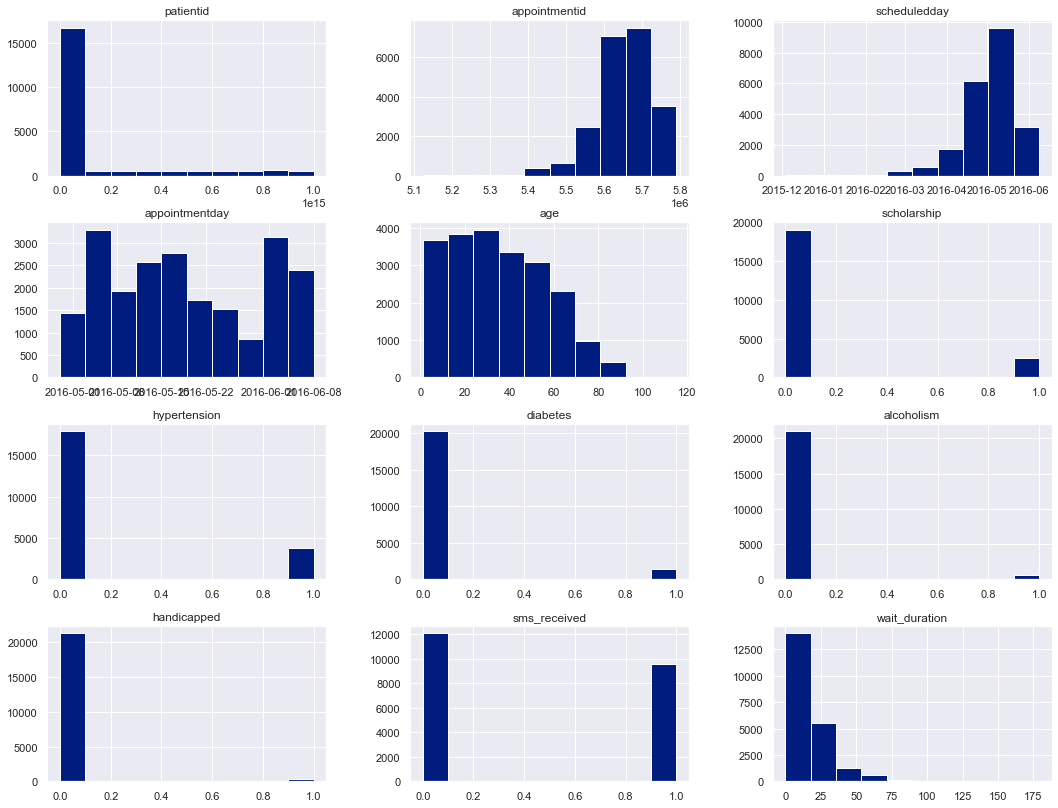

In [94]:
df[df['no-show']=='Yes'].hist(figsize=(18,14));

In [95]:
df[df['no-show']=='No'].describe()

,patientid,appointmentid,age,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received,wait_duration
count,8.514900e+04,8.514900e+04,85149.000000,85149.000000,85149.000000,85149.000000,85149.000000,85149.000000,85149.000000,85149.000000
mean,1.474418e+14,5.681233e+06,39.063700,0.096548,0.211018,0.076078,0.031439,0.019671,0.293356,8.742134
std,2.561041e+14,6.936782e+04,22.640302,0.295344,0.408034,0.265125,0.174502,0.138869,0.455303,14.564219
min,3.921700e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.169965e+12,5.646451e+06,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.175832e+13,5.685851e+06,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,9.423417e+13,5.731149e+06,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


In [96]:
## creating a subgroup for records of those that showed up
df_show = df[df['no-show']=='No']

In [97]:
perc_show = round(len(df_show.index)*100/len(df.index),2)
count_show = len(df_show.index)

In [98]:
df_show
print("There are {} instances of patients showing up for their appointments which is {}% of the records".format(count_show,perc_show))

There are 85149 instances of patients showing up for their appointments which is 79.74% of the records


In [99]:
df_noshow = df[df['no-show']=='Yes']

In [100]:
perc_noshow = round(len(df_noshow.index)*100/len(df.index),2)
count_noshow = len(df_noshow.index)

In [101]:
df_noshow
print("There are {} instances of patients NOT showing up for their appointments which is {}%".format(count_noshow,perc_noshow))

There are 21634 instances of patients NOT showing up for their appointments which is 20.26%


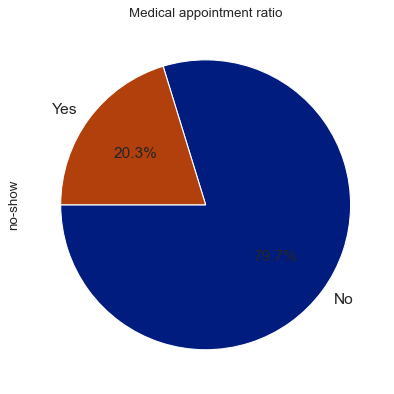

In [102]:
fig = plt.figure(figsize=(6,6), dpi=80)
ax = plt.subplot(111)
df['no-show'].value_counts().plot(kind='pie',title= 'Medical appointment ratio', ax=ax, autopct='%1.1f%%', startangle=180, fontsize=14);

## Comparing the show vs no-show appointment by factors
---
### a) Age of patients


In [103]:
# Calcuting the mean age for those that showed up for their appointment
show_avg = int(df_show.age.mean())
print("The average age of patients who show up is {} years.".format(show_avg))

The average age of patients who show up is 39 years.


In [104]:
# those who didn't
nshow_avg = int(df_noshow.age.mean())
print("The average age of patients who did not show up is {} years.".format(nshow_avg))

The average age of patients who did not show up is 35 years.


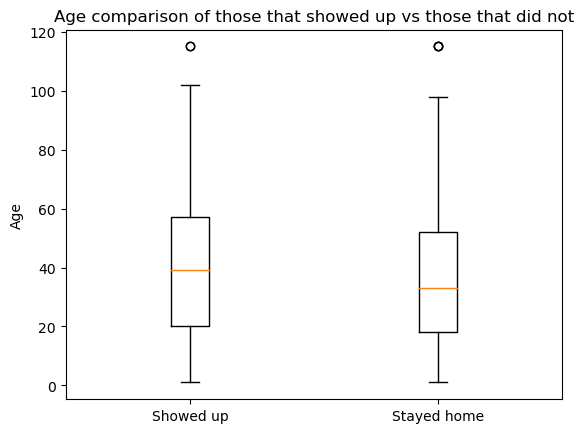

In [105]:
plt.style.use('default')
show_age = df_show['age']
noshow_age = df_noshow['age']
plt.boxplot([show_age,noshow_age], labels = ['Showed up','Stayed home']);

plt.title('Age comparison of those that showed up vs those that did not')
plt.ylabel('Age')
plt.show()

> There is only a slight difference in the age plot!

### b) Gender 

In [189]:
# count of male patients and the distribtuion
male = df[df['gender']== 'M']
male_count = len(male)
male_perc = round(male_count/len(df)*100,1)
print("{} patients were male which is {}% of the total.".format(male_count,male_perc))

36777 patients were male which is 34.4% of the total.


In [190]:
# count of female patients and the distribtuion
female = df[df['gender']== 'F']
female_count = len(female)
female_perc = round(female_count/len(df)*100,1)
print("{} patients were female which is {}% of the total.".format(female_count,female_perc))

70006 patients were female which is 65.6% of the total.


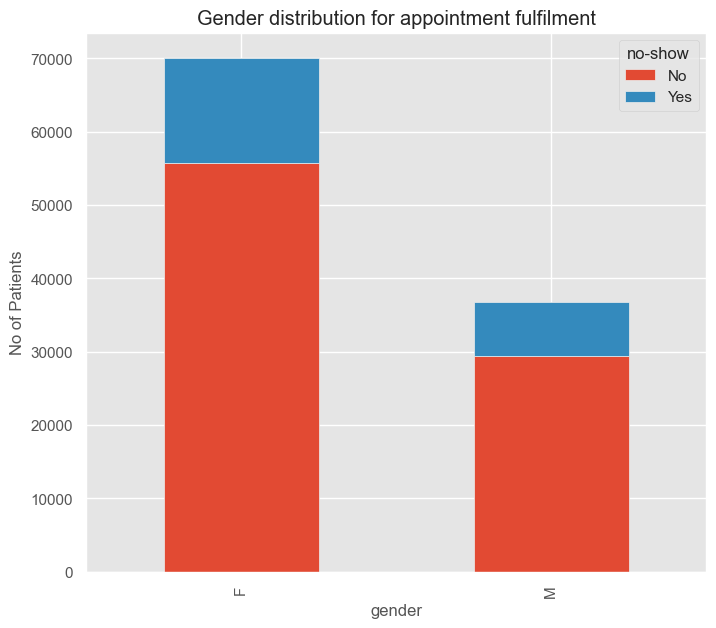

In [226]:
# putting it in plot
df.groupby(['gender', 'no-show']).size().unstack().plot(kind='bar', stacked=True, figsize=(8, 7), title='Gender distribution for appointment fulfilment', ylabel = 'No of Patients');

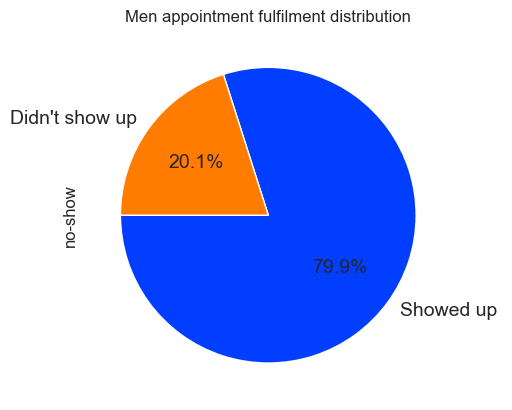

In [200]:
## men appointment fulfilment distribution
plt.title('Men appointment fulfilment distribution')
label1 = ['Showed up ', 'Didn\'t show up']
male['no-show'].value_counts().plot(kind='pie', labels = label1 , autopct='%1.1f%%', startangle=180, fontsize=14);

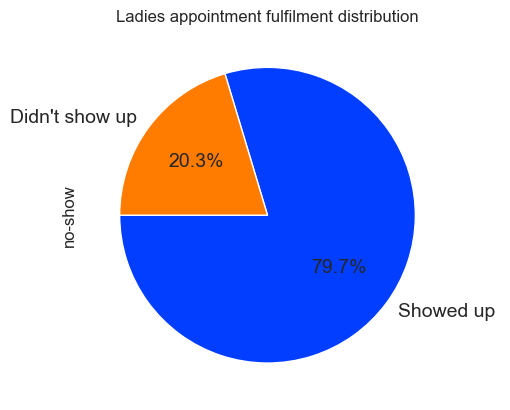

In [201]:
## Ladies appointment fulfilment distribution
plt.title('Ladies appointment fulfilment distribution')
label1 = ['Showed up ', 'Didn\'t show up']
female['no-show'].value_counts().plot(kind='pie', labels = label1 , autopct='%1.1f%%', startangle=180, fontsize=14);

### c) Does the scholarship encourages or it is the other way round

In [106]:
sch = df[df['scholarship']== 1]
sch_count = len(sch)
print("{} patients got the scholarship.".format(sch_count))

10791 patients got the scholarship.


In [107]:
nsch = df[df['scholarship']== 0]
nsch_count = len(nsch)
print("{} patients did not get the scholarship.".format(nsch_count))

95992 patients did not get the scholarship.


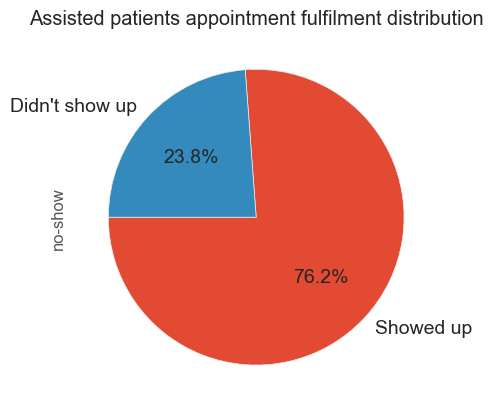

In [202]:
# Does being assisted encourages the patients to show up
plt.style.use('ggplot')
plt.title('Assisted patients appointment fulfilment distribution')
sch['no-show'].value_counts().plot(kind='pie', labels = label1 , autopct='%1.1f%%', startangle=180, fontsize=14);

> **76.2%** of patients with scholarship showed up for their appointments.

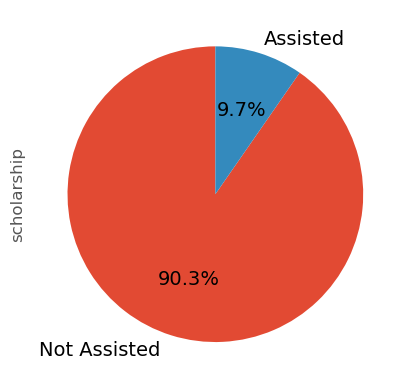

In [109]:
labels = ['Not Assisted ', 'Assisted']
df_show['scholarship'].value_counts().plot(kind='pie',labels = labels ,autopct='%1.1f%%', startangle=90, fontsize=14);

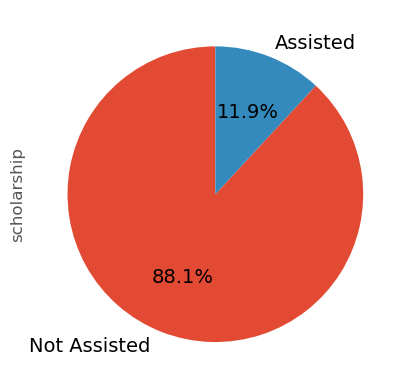

In [110]:
df_noshow['scholarship'].value_counts().plot(kind='pie' ,labels = labels,  autopct='%1.1f%%', startangle=90, fontsize=14);

> Only **9.7%** of those that showed up for their appointments were with schorlarship while a higher figure of **11.9%** of those that didn't show up were with scholarship.


### d) Does patients with a condition feels more need to visit the doctor ?

In [112]:
hyp = df[df['hypertension']== 1]
hyp_count = len(hyp)
print("{} hypertensive patients.".format(hyp_count))

21716 hypertensive patients.


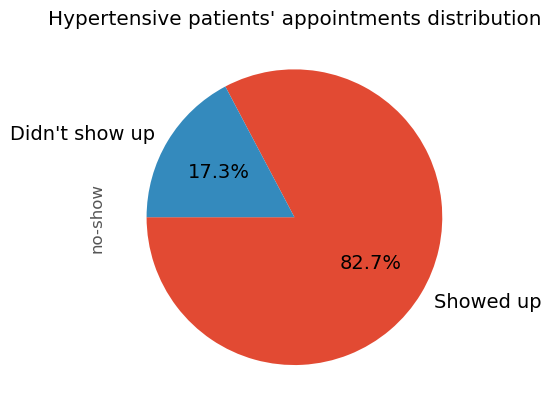

In [113]:
plt.style.use('ggplot')
plt.title('Hypertensive patients\' appointments distribution')
hyp['no-show'].value_counts().plot(kind='pie', labels = label1 , autopct='%1.1f%%', startangle=180, fontsize=14);

In [114]:
diab = df[df['diabetes']== 1]
diab_count = len(diab)
print("There are {} diabetic patients.".format(diab_count))

There are 7900 diabetic patients.


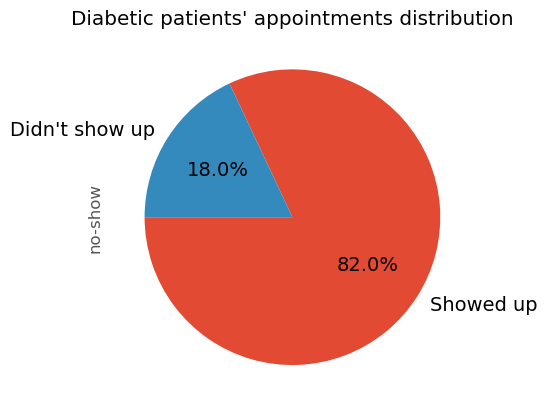

In [115]:
plt.title('Diabetic patients\' appointments distribution')
diab['no-show'].value_counts().plot(kind='pie', labels = label1 , autopct='%1.1f%%', startangle=180, fontsize=14);

#### It will be interesting to check if having one form or ailments or challenges contributes to patients keeping up to appointments
To do this, the dataset will be queried to return patients with any form of ailment, from `diabetes`, `hypertension` to `alcoholism`.

In [116]:
sick = df.query('diabetes == 1 | hypertension == 1 | alcoholism == 1')
sick_count = len(sick.index)
print("There are {} patients with at least one form of ailment/challenge.".format(sick_count))

There are 25125 patients with at least one form of ailment/challenge.


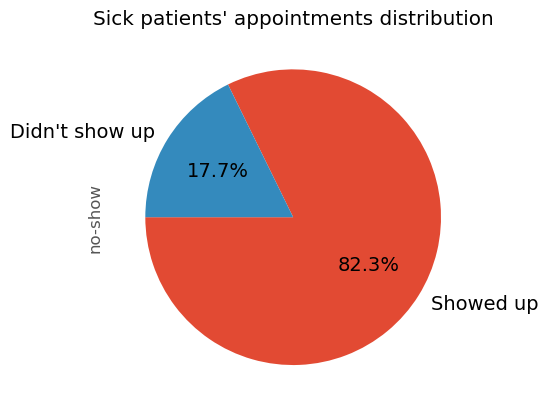

In [117]:
plt.title('Sick patients\' appointments distribution')
sick['no-show'].value_counts().plot(kind='pie', labels = label1 , autopct='%1.1f%%', startangle=180, fontsize=14);

> it actually gave us a `82.3%` likelihood like it is around 82% for those ailment analysed individually.

In [118]:
# lets just check our not so sick
not_sick = df.query('diabetes == 0 & hypertension == 0 & alcoholism == 0')
nosick_count = len(not_sick.index)
print("There are {} patients with none of the highlighted challenges.".format(nosick_count))

There are 81658 patients with none of the highlighted challenges.


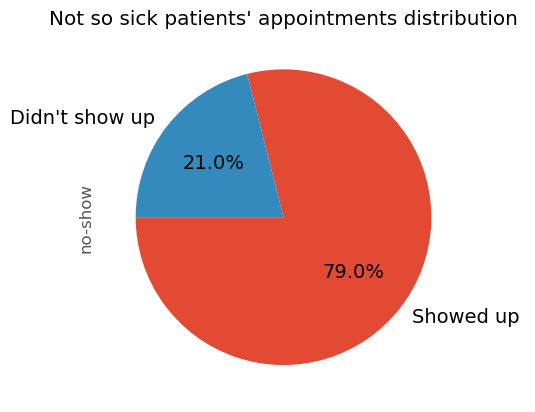

In [119]:
plt.title('Not so sick patients\' appointments distribution')
not_sick['no-show'].value_counts().plot(kind='pie', labels = label1 , autopct='%1.1f%%', startangle=180, fontsize=14);

> Although compared to those with ailment, there is 3% drop in those that showed up with no ailment.

#### Being handicapped?

In [120]:
handy = df[df['handicapped']== 1]
hand_count = len(handy)
print("There are {} handicapped patients.".format(hand_count))

There are 2039 handicapped patients.


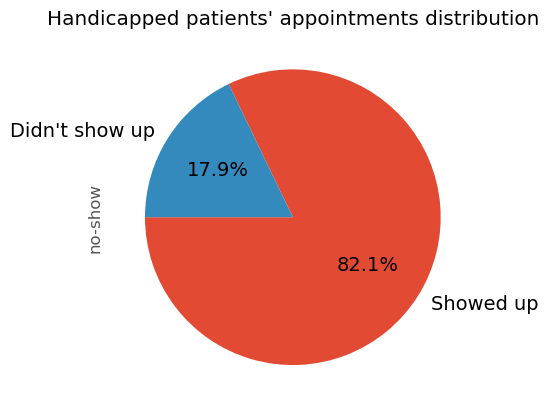

In [121]:
plt.title('Handicapped patients\' appointments distribution')
handy['no-show'].value_counts().plot(kind='pie', labels = label1 , autopct='%1.1f%%', startangle=180, fontsize=14);

> Being handicapped surely didn't stop majority

### e) How much the patients had to wait?

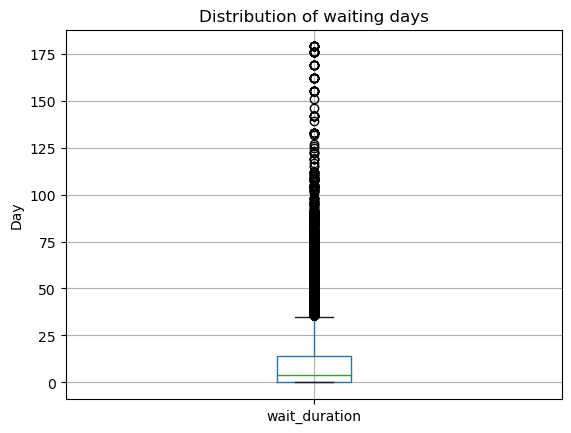

In [122]:
plt.style.use('default')
df.boxplot(column ='wait_duration');
plt.title('Distribution of waiting days')
plt.ylabel('Day')
plt.show()

In [123]:
# categorizing the waiting periods
# create a list of our conditions
conditions = [
    (df['wait_duration'] == 0),
    (df['wait_duration'] > 0) & (df['wait_duration'] <= 7),
    (df['wait_duration'] > 7) & (df['wait_duration'] <= 14),
    (df['wait_duration'] > 14) & (df['wait_duration'] <= 30),
    (df['wait_duration'] > 30)
    ]

In [124]:
#creating the categories labelling
values = ['same_day', 'a_week_or_less', 'almost_two_weeks', 'almost_a_month', 'too_long']

In [125]:
df['how_long'] = np.select(conditions,values)

In [126]:
# check if it worked
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received,no-show,wait_duration,how_long
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,same_day
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,same_day
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,same_day
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,same_day
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,same_day


In [127]:
df['how_long'].value_counts()

same_day            37077
a_week_or_less      31384
almost_a_month      16710
almost_two_weeks    11627
too_long             9985
Name: how_long, dtype: int64

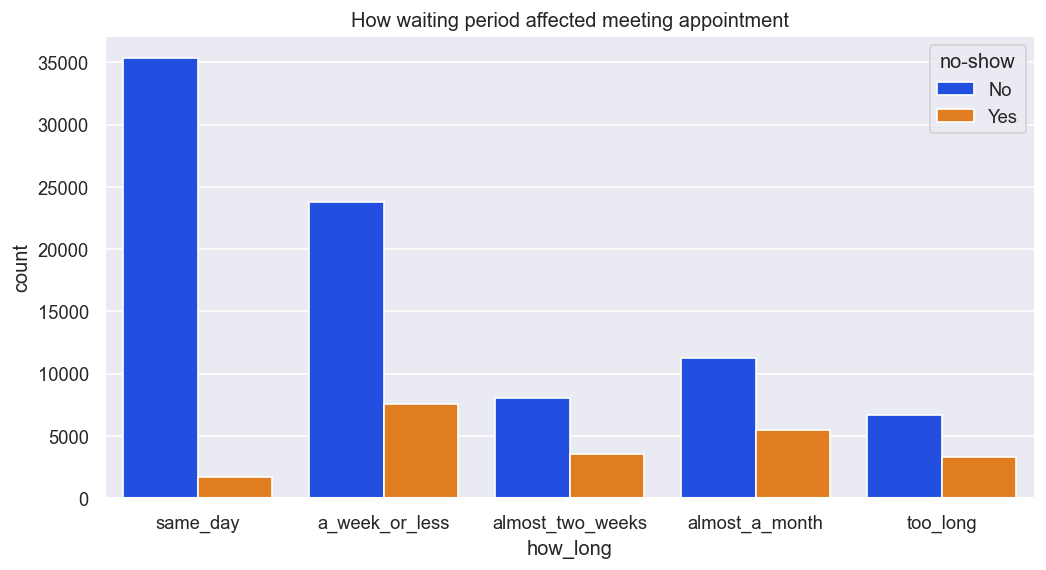

In [140]:
# importing seaborn to use countplot
import seaborn as sns
fig = plt.figure(figsize=(10,5), dpi=120)
sns.set_theme(style="darkgrid", palette= 'bright')
ax = sns.countplot(x=df.how_long, hue=df['no-show'], data=df).set(title='How waiting period affected meeting appointment')
xlabels = 'How long it took patients'
plt.show();

### let's express this in percentages to get a better picture

When appointment was fixed on the same day of scheduling, 95.3% tends to be available with only 4.7% missing out!


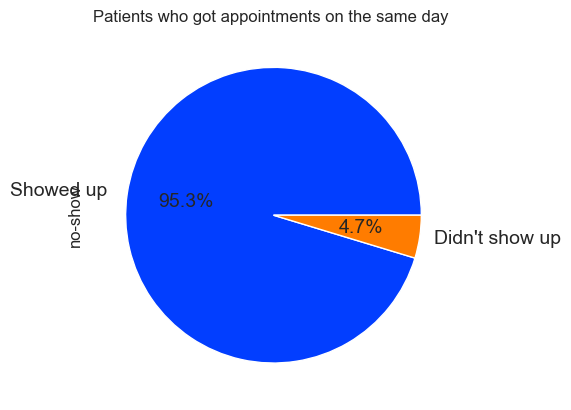

In [144]:
same_day = df.query("how_long== 'same_day'")
plt.title('Patients who got appointments on the same day ')
same_day['no-show'].value_counts().plot(kind='pie', labels = label1 , autopct='%1.1f%%', startangle=0, fontsize=14);
# In print out
sameday_nshow = round(len(same_day[df['no-show'] == 'Yes'])/len(same_day['no-show'])*100, 1)
sameday_show = round(len(same_day[df['no-show'] == 'No'])/len(same_day['no-show'])*100, 1)
print('When appointment was fixed on the same day of scheduling, {}% tends to be available with only {}% missing out!'.format(sameday_show,sameday_nshow))

When appointment was fixed within a week of scheduling, 75.9% tends to be available with only 24.1% missing out!


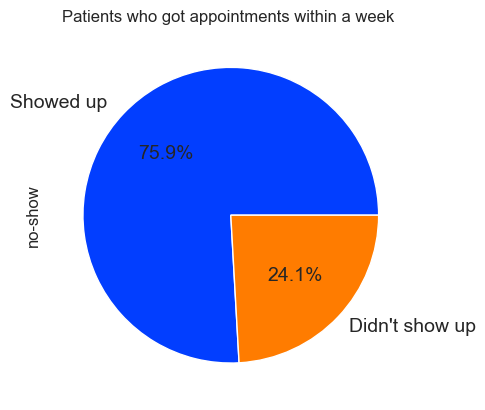

In [149]:
a_week = df.query("how_long== 'a_week_or_less'")
plt.title('Patients who got appointments within a week ')
a_week['no-show'].value_counts().plot(kind='pie', labels = label1 , autopct='%1.1f%%', startangle=0, fontsize=14);
# In print out
a_week_nshow = round(len(a_week[df['no-show'] == 'Yes'])/len(a_week['no-show'])*100, 1)
a_week_show = round(len(a_week[df['no-show'] == 'No'])/len(a_week['no-show'])*100, 1)
print('When appointment was fixed within a week of scheduling, {}% tends to be available with only {}% missing out!'.format(a_week_show,a_week_nshow))

When appointment was fixed for more than a week but within 2 week of scheduling, 69.5% tends to be available with only 30.5% missing out!


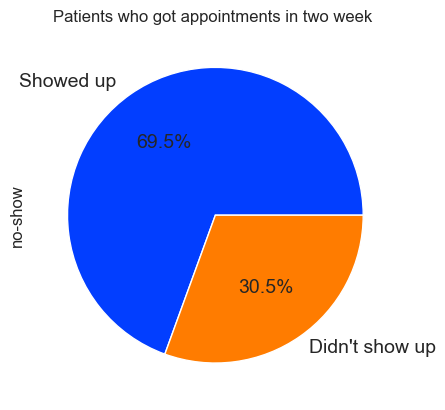

In [150]:
twoweeks = df.query("how_long== 'almost_two_weeks'")
plt.title('Patients who got appointments in two week ')
twoweeks['no-show'].value_counts().plot(kind='pie', labels = label1 , autopct='%1.1f%%', startangle=0, fontsize=14);
# In print out
twoweeks_nshow = round(len(twoweeks[df['no-show'] == 'Yes'])/len(twoweeks['no-show'])*100, 1)
twoweeks_show = round(len(twoweeks[df['no-show'] == 'No'])/len(twoweeks['no-show'])*100, 1)
print('When appointment was fixed for more than a week but within 2 week of scheduling, {}% tends to be available with only {}% missing out!'.format(twoweeks_show,twoweeks_nshow))

When appointment was fixed for in a month of scheduling, 67.3% tends to be available with only 32.7% missing out!


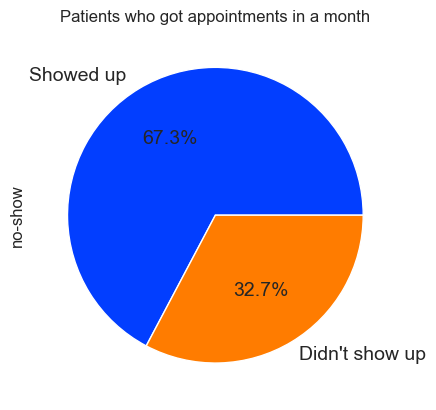

In [152]:
a_month = df.query("how_long== 'almost_a_month'")
plt.title('Patients who got appointments in a month')
a_month['no-show'].value_counts().plot(kind='pie', labels = label1 , autopct='%1.1f%%', startangle=0, fontsize=14);
# In print out
a_month_nshow = round(len(a_month[df['no-show'] == 'Yes'])/len(a_month['no-show'])*100, 1)
a_month_show = round(len(a_month[df['no-show'] == 'No'])/len(a_month['no-show'])*100, 1)
print('When appointment was fixed for in a month of scheduling, {}% tends to be available with only {}% missing out!'.format(a_month_show,a_month_nshow))

When appointment was fixed for over a month of scheduling, 66.9% tends to be available with only 33.1% missing out!


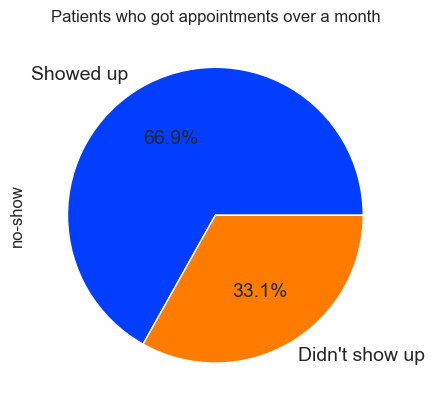

In [153]:
too_long = df.query("how_long== 'too_long'")
plt.title('Patients who got appointments over a month')
too_long['no-show'].value_counts().plot(kind='pie', labels = label1 , autopct='%1.1f%%', startangle=0, fontsize=14);
# In print out
too_long_nshow = round(len(too_long[df['no-show'] == 'Yes'])/len(too_long['no-show'])*100, 1)
too_long_show = round(len(too_long[df['no-show'] == 'No'])/len(too_long['no-show'])*100, 1)
print('When appointment was fixed for over a month of scheduling, {}% tends to be available with only {}% missing out!'.format(too_long_show,too_long_nshow))

> *There's an increase in the proportion of patients who didn't show up with increase in waiting days.*

### f) Does a reminder help?

In [155]:
reminded = df.query('sms_received == 1')
reminded

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received,no-show,wait_duration,how_long
11,7542951368435,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,3,a_week_or_less
15,99948393975,5620206,F,2016-04-26 08:47:27+00:00,2016-04-29 00:00:00+00:00,15,NOVA PALESTINA,0,0,0,0,0,1,No,3,a_week_or_less
18,17135378245248,5621836,F,2016-04-26 10:54:18+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,1,0,0,0,0,1,No,3,a_week_or_less
22,863229818887631,5616091,M,2016-04-25 13:29:16+00:00,2016-04-29 00:00:00+00:00,13,CONQUISTA,0,0,0,0,0,1,Yes,4,a_week_or_less
25,5819369978796,5624020,M,2016-04-26 15:04:17+00:00,2016-04-29 00:00:00+00:00,46,CONQUISTA,0,1,0,0,0,1,No,3,a_week_or_less
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,35,too_long
110523,3596266328735,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,35,too_long
110524,15576631729893,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,41,too_long
110525,92134931435557,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,41,too_long


In [158]:
len(reminded)
print('{} patients actually got a reminder.'.format(len(reminded)))

34538 patients actually got a reminder.


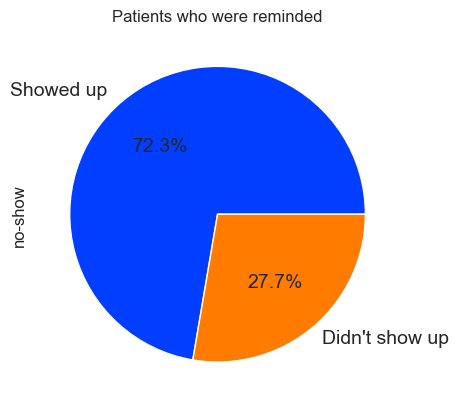

In [172]:
plt.title('Patients who were reminded')
reminded['no-show'].value_counts().plot(kind='pie', labels = label1 , autopct='%1.1f%%', startangle=0, fontsize=14);

In [169]:
# for those not reminded
not_reminded = df.query('sms_received == 0')
print('The other {} patients didn\'t get a reminder.'.format(len(not_reminded)))

The other 72245 patients didn't get a reminder


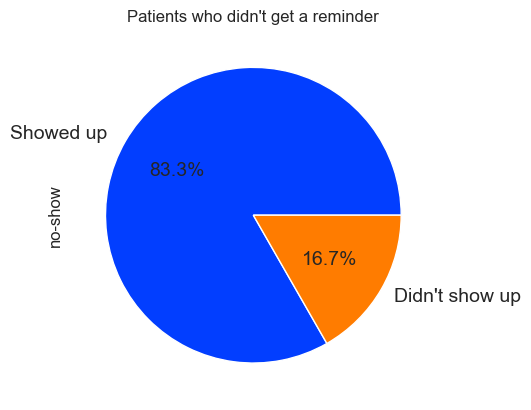

In [171]:
plt.title('Patients who didn\'t get a reminder')
not_reminded['no-show'].value_counts().plot(kind='pie', labels = label1 , autopct='%1.1f%%', startangle=0, fontsize=14);

> Oops, the reminded turned out to miss more!

### f) Another interesting factor to look into is if the day of appointment affects patients showing or not showing up

In [174]:
### To create a column to show what day the appointment date falls on
df['day_of_appointment'] = df['appointmentday'].dt.day_name()

In [176]:
# to check
df.tail()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received,no-show,wait_duration,how_long,day_of_appointment
110522,2572134369293,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,35,too_long,Tuesday
110523,3596266328735,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,35,too_long,Tuesday
110524,15576631729893,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,41,too_long,Tuesday
110525,92134931435557,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,41,too_long,Tuesday
110526,377511518121127,5629448,F,2016-04-27 13:30:56+00:00,2016-06-07 00:00:00+00:00,54,MARIA ORTIZ,0,0,0,0,0,1,No,41,too_long,Tuesday


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106783 entries, 0 to 110526
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   patientid           106783 non-null  int64              
 1   appointmentid       106783 non-null  int64              
 2   gender              106783 non-null  object             
 3   scheduledday        106783 non-null  datetime64[ns, UTC]
 4   appointmentday      106783 non-null  datetime64[ns, UTC]
 5   age                 106783 non-null  int64              
 6   neighbourhood       106783 non-null  object             
 7   scholarship         106783 non-null  int64              
 8   hypertension        106783 non-null  int64              
 9   diabetes            106783 non-null  int64              
 10  alcoholism          106783 non-null  int64              
 11  handicapped         106783 non-null  int64              
 12  sms_received    

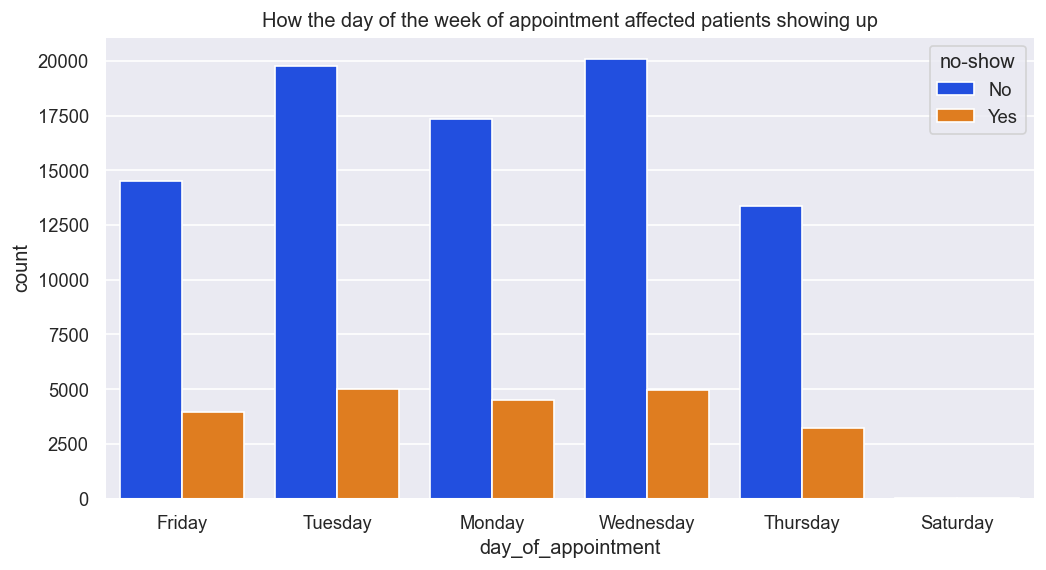

In [187]:
fig = plt.figure(figsize=(10,5), dpi=120)
sns.set_theme(style="darkgrid", palette= 'bright')
ax = sns.countplot(x=df.day_of_appointment, hue=df['no-show'], data=df).set(title='How the day of the week of appointment affected patients showing up')
plt.show();

In [250]:
mon = df.query('day_of_appointment == "Monday"')
tues = df.query('day_of_appointment == "Tuesday"')
wed = df.query('day_of_appointment == "Wednesday"')
thur = df.query('day_of_appointment == "Thursday"')
fri = df.query('day_of_appointment == "Friday"')
sat = df.query('day_of_appointment == "Saturday"')
sun = df.query('day_of_appointment == "Sunday"')
dow = [mon,tues,wed,thur,fri,sat,sun]
for day in dow:
    day_perc = round(len(day)/len(df)*100,2)
    print('{} got {}% of the appointments'.format(day_perc))

TypeError: 'list' object is not callable

> Weekends are almost off limits!

### g) The Neighbourhood

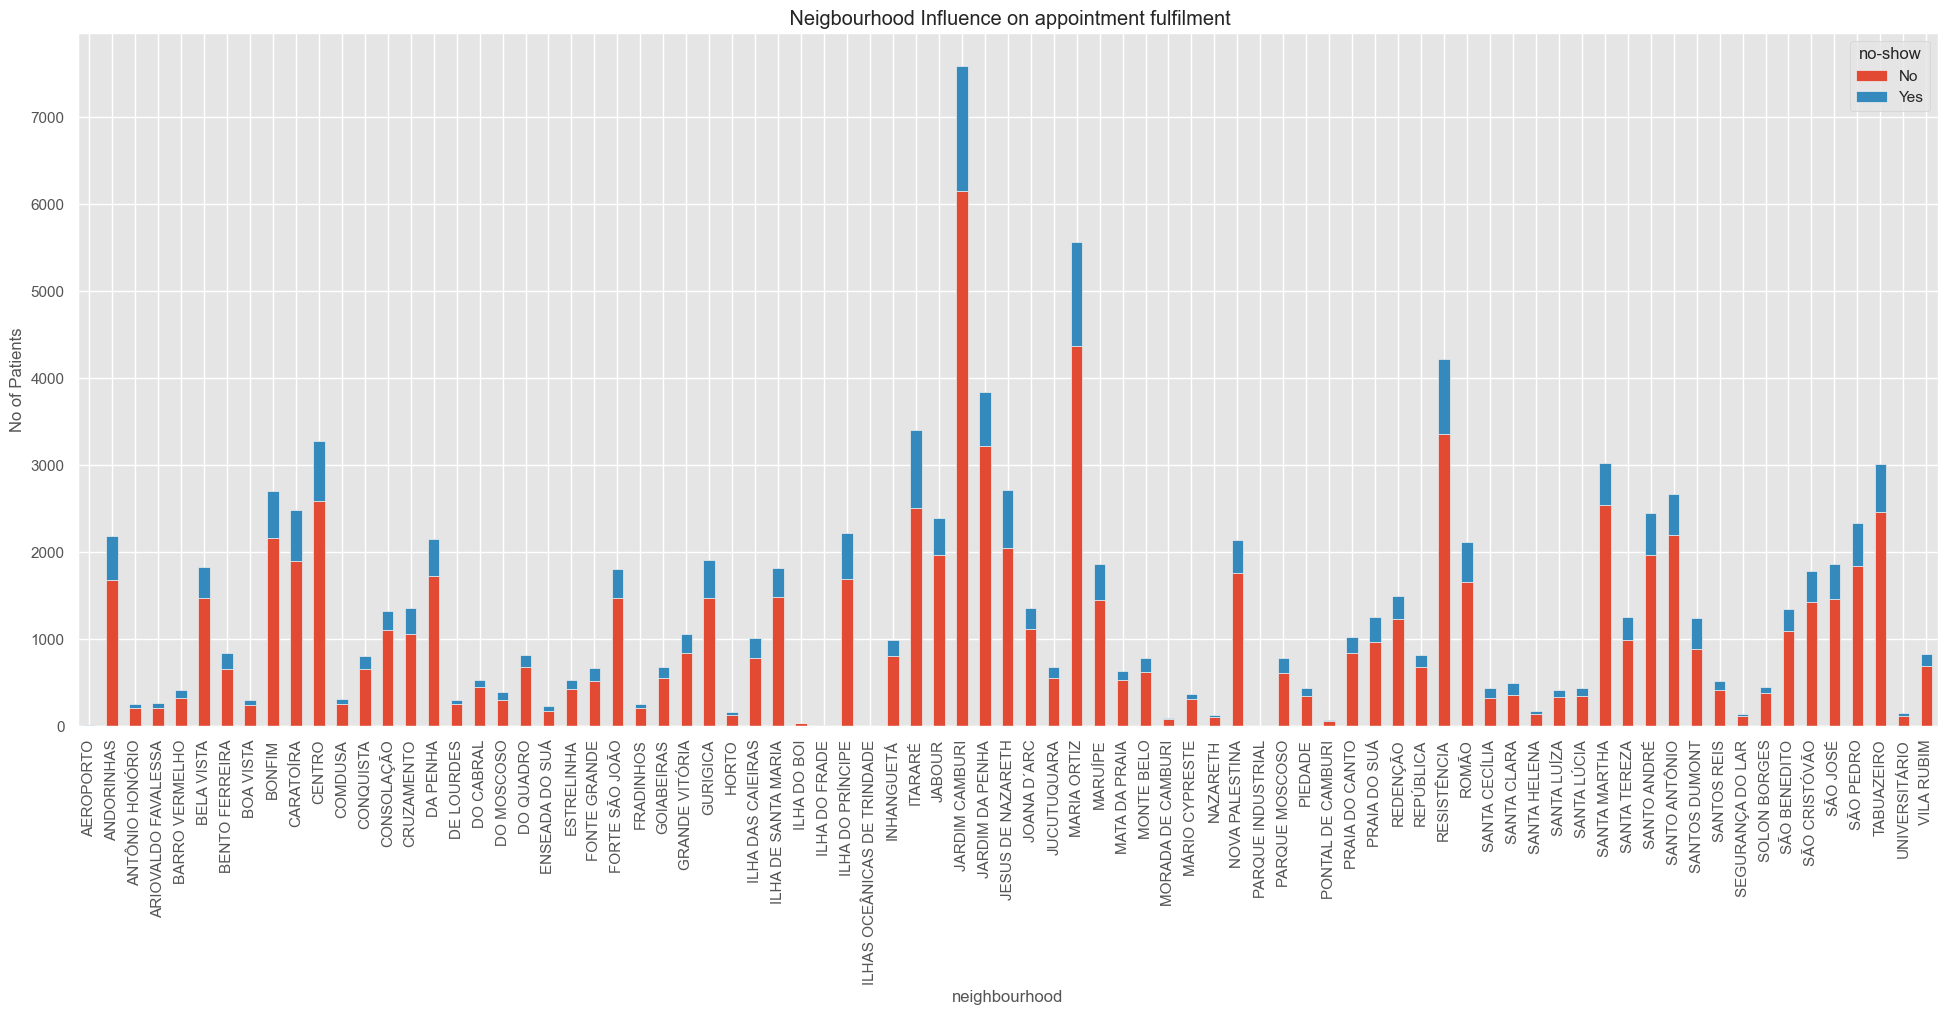

In [225]:
# The locations of the hospital and the ditribution
df.groupby(['neighbourhood', 'no-show']).size().unstack().plot(kind='bar', stacked=True, figsize=(24, 9), title=' Neigbourhood Influence on appointment fulfilment', ylabel = 'No of Patients');

## 4.Conclusions